## Import packages

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

## Plot 1

C:\Users\Beckh\AppData\Local\Temp\ipykernel_10716\1336820371.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot1_df["prevalence_pct"] = plot1_df["val"] * 100


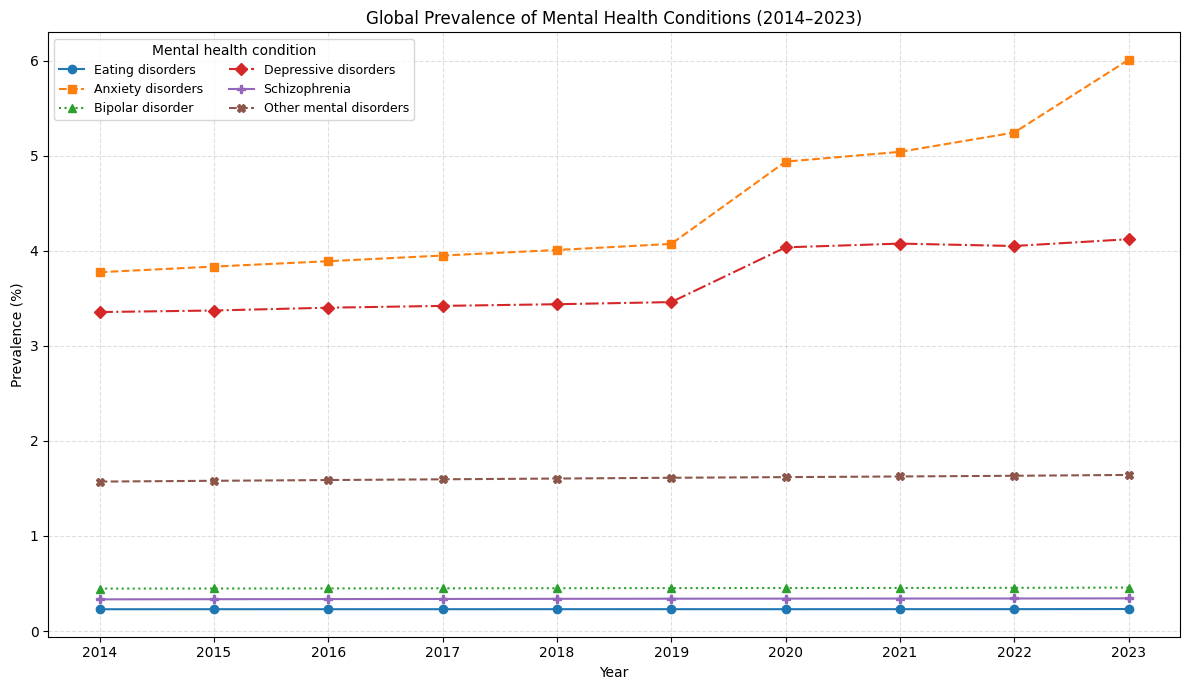

In [18]:
df = pd.read_csv("global_mental_health.csv")

# Filtered df for plot 1 requirements, just for completeness sake (although for some features, there may only be a unique instance)
plot1_df = df[
    (df["measure_name"] == "Prevalence") &
    (df["metric_name"] == "Percent") &
    (df["location_name"] == "Global") &
    (df["age_name"] == "All ages") &
    (df["sex_name"] == "Both") &
    # filter latest 10 years available
    (df["year"] >= 2014) &          # start year
    (df["year"] <= 2023)            # end year
]

# convert prevelance percent to %
plot1_df["prevalence_pct"] = plot1_df["val"] * 100

# sort data by year
plot1_df = plot1_df.sort_values("year")

# line plot
plt.figure(figsize=(12, 7))

# Define marker and line style mappings for accessibility / pass the grayscale test
markers = ["o", "s", "^", "D", "P", "X", "v", "<", ">"]
linestyles = ["-", "--", ":", "-."]

conditions = plot1_df["cause_name"].unique()

for i, condition in enumerate(conditions):
    subset = plot1_df[plot1_df["cause_name"] == condition]
    plt.plot(
        subset["year"],
        subset["prevalence_pct"],
        linestyle=linestyles[i % len(linestyles)],
        marker=markers[i % len(markers)],
        linewidth=1.5,
        alpha=1.0,
        label=condition
    )

plt.xlabel("Year")
plt.ylabel("Prevalence (%)")
plt.title("Global Prevalence of Mental Health Conditions (2014–2023)")
plt.legend(
    title="Mental health condition",
    fontsize=9,
    title_fontsize=10,
    ncol=2            
)
plt.xticks(range(2014, 2024))
plt.grid(True, linestyle="--", alpha=0.4)
plt.tight_layout()
plt.show()

## Plot 2


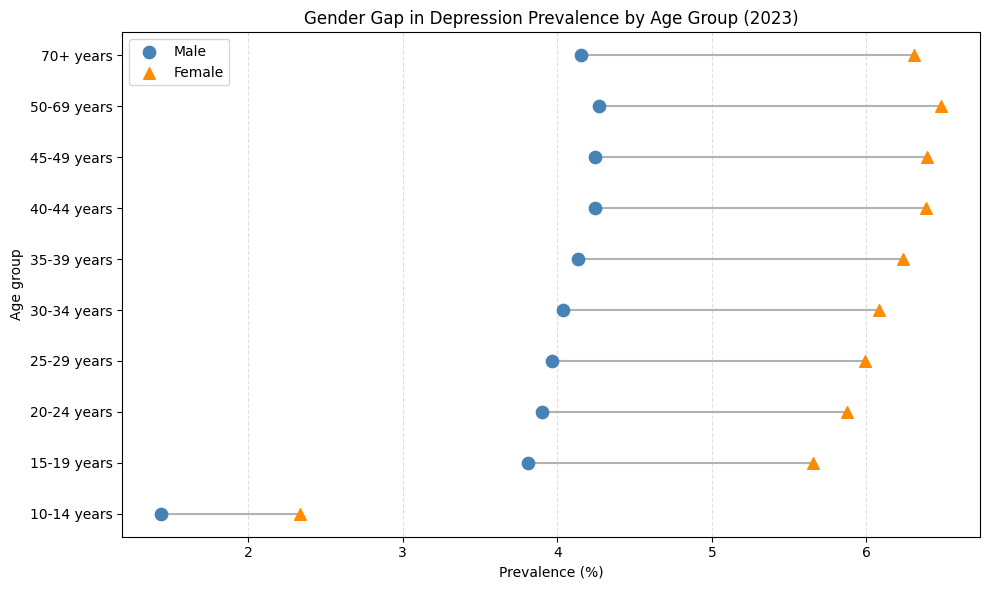

In [19]:
df = pd.read_csv("global_mental_health_2023.csv")

# Filtered df for plot 2 requirements
plot2_df = df[
    (df["measure_name"] == "Prevalence") &
    (df["metric_name"] == "Percent") &
    (df["location_name"] == "Global") &
    (df["year"] == 2023) &
    (df["cause_name"] == "Depressive disorders") &
    (df["sex_name"].isin(["Male", "Female"]))
].copy()

# Exclude non-informative age groups
exclude_ages = ["<5 years", "5-9 years", "All ages"]
plot2_df = plot2_df[~plot2_df["age_name"].isin(exclude_ages)]

# Convert to percentage
plot2_df["prevalence_pct"] = plot2_df["val"] * 100

# Sort by age
plot2_df = plot2_df.sort_values("age_id")

# Split by gender
male_df = plot2_df[plot2_df["sex_name"] == "Male"].reset_index(drop=True)
female_df = plot2_df[plot2_df["sex_name"] == "Female"].reset_index(drop=True)

# Dumbbell plott
plt.figure(figsize=(10, 6))

for i in range(len(male_df)):
    male_val = male_df.loc[i, "prevalence_pct"]
    female_val = female_df.loc[i, "prevalence_pct"]

    # Connecting line between male and female prevalence
    plt.plot(
        [male_val, female_val],
        [i, i],
        color="gray",
        alpha=0.6,
        zorder=1
    )

    # Male represented by hollow circle fpr interpretabiltiy
    plt.scatter(
        male_val,
        i,
        marker="o",
        color = "steelblue",
        s=70,
        linewidths=1.5,
        label="Male" if i == 0 else "",
        zorder=2
    )

    # Female, represented by filled triangle for interpretability
    plt.scatter(
        female_val,
        i,
        marker="^",
        color="darkorange",
        s=70,
        label="Female" if i == 0 else "",
        zorder=2
    )

# -----------------------------
# 5. Formatting
# -----------------------------
plt.yticks(range(len(male_df)), male_df["age_name"])
plt.xlabel("Prevalence (%)")
plt.ylabel("Age group")
plt.title("Gender Gap in Depression Prevalence by Age Group (2023)")

plt.legend()
plt.grid(axis="x", linestyle="--", alpha=0.4)
plt.tight_layout()
plt.show()

## Plot 3

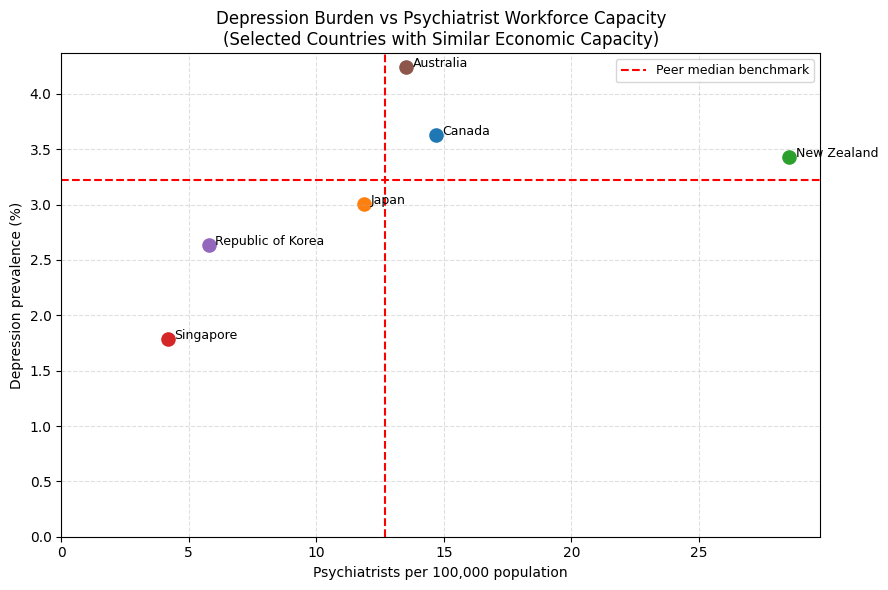

In [20]:
dep_df = pd.read_csv("global_mental_health_2013_2017.csv")
psy_df = pd.read_csv("psychiatrists_working_in_mental_health_sector.csv")

# Filtered df for plot 3 requirements
dep_df = dep_df[
    (dep_df["measure_name"] == "Prevalence") &
    (dep_df["metric_name"] == "Percent") &
    (dep_df["cause_name"] == "Depressive disorders") &
    (dep_df["age_name"] == "All ages") &
    (dep_df["sex_name"] == "Both")
].copy()

# values in excel in not in terms of %
dep_df["depression_pct"] = dep_df["val"] * 100

psy_df = psy_df.rename(columns={
    "Location": "location_name",
    "Year": "year",
    "Psychiatrists working in mental health sector (per 100,000)": "psy_per_100k"
})

# merge datasets on location and year
merged_df = pd.merge(
    psy_df,
    dep_df,
    on=["location_name", "year"],
    how="inner"
)

# comparator countries selected with similar economic capacities
comparator_countries = [
    "Singapore",
    "Japan",
    "Republic of Korea",
    "Australia",
    "New Zealand",
    "Canada"
]

plot3_df = merged_df[
    merged_df["location_name"].isin(comparator_countries)
].copy()

# median values for median line
median_psy = plot3_df["psy_per_100k"].median()
median_dep = plot3_df["depression_pct"].median()

# Scatter plot with median line
plt.figure(figsize=(9, 6))

colors = plt.cm.tab10(range(len(plot3_df)))

for i, (_, row) in enumerate(plot3_df.iterrows()):
    plt.scatter(
        row["psy_per_100k"],
        row["depression_pct"],
        s=90,
        color=colors[i]
    )
    plt.text(
        row["psy_per_100k"] + 0.25,
        row["depression_pct"],
        row["location_name"],
        fontsize=9
    )

# Median lines
plt.axvline(
    x=median_psy,
    linestyle="--",
    linewidth=1.5,
    color="red",
    label="Peer median benchmark"
)

plt.axhline(
    y=median_dep,
    linestyle="--",
    linewidth=1.5,
    color="red"
)

plt.xlim(left=0)
plt.ylim(bottom=0)

plt.xlabel("Psychiatrists per 100,000 population")
plt.ylabel("Depression prevalence (%)")
plt.title("Depression Burden vs Psychiatrist Workforce Capacity\n" \
"(Selected Countries with Similar Economic Capacity)")

plt.legend(fontsize=9)
plt.grid(True, linestyle="--", alpha=0.4)
plt.tight_layout()
plt.show()